# Ponderada de Matemática Semana 1 - Módulo 8
Prof. Geraldo Magela | Aluno Rafael techio

Um engenheiro de manutenção de uma grande empresa de data centers deseja analisar o indicador de Tempo Médio Entre Falhas (MTBF) para prever a confiabilidade de um novo servidor que pretende implementar. Ele registrou os tempos entre falhas dos servidores atuais nos últimos 12 meses. Para realizar essa previsão, ele pretende utilizar uma média móvel de ordem 4. Os dados registrados sobre os tempos (em horas) entre falhas nos últimos 12 meses são os seguintes: Janeiro: 500 Fevereiro: 520 Março: 510 Abril: 530 Maio: 540 Junho: 550 Julho: 540 Agosto: 530 Setembro: 520 Outubro: 510 Novembro: 500 Dezembro: 490 a) Calcule o MTBF previsto para o mês de janeiro do próximo ano usando a média móvel de ordem 4. b) Faça um gráfico para visualizar a série original e a série suavizada. c) Como você avaliaria a confiabilidade do servidor com base nesse indicador?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.DataFrame({
    "month_name": ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"],
    "month_number": [1,2,3,4,5,6,7,8,9,10,11,12],
    "time_between_fails": [500, 520, 510, 530, 540, 550, 540, 530, 520, 510, 500, 490]
})

data

,month_name,month_number,time_between_fails
0,Janeiro,1,500
1,Fevereiro,2,520
2,Março,3,510
3,Abril,4,530
4,Maio,5,540
5,Junho,6,550
6,Julho,7,540
7,Agosto,8,530
8,Setembro,9,520
9,Outubro,10,510


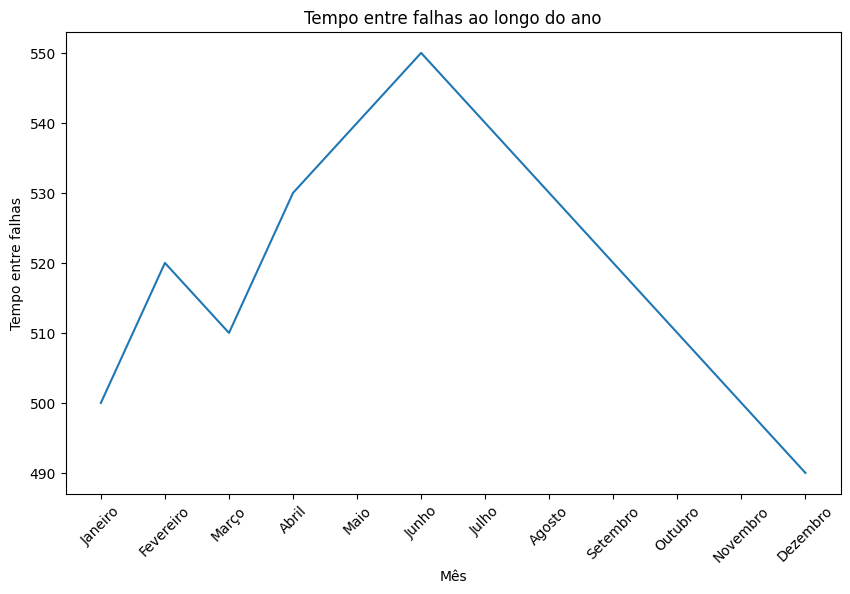

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data['month_name'], data['time_between_fails'])

plt.title('Tempo entre falhas ao longo do ano')
plt.xlabel('Mês')
plt.ylabel('Tempo entre falhas')
plt.xticks(rotation=45)

plt.show()

In [ ]:
def mean_4_months(month_number, df):
  if month_number < 3:
    value =  df.loc[:month_number-2, 'time_between_fails'].mean()
    if np.isnan(value):
      return df.loc[month_number-1, 'time_between_fails']
    else:
      return value
  else:
    return df.loc[month_number-5:month_number-2, 'time_between_fails'].mean()

data['prevision'] = data.apply(lambda row: mean_4_months(row.month_number, data), axis=1)

prev_jan = mean_4_months(13, data)
data.loc[len(data)] = ["Janeiro (Previsão)", 13, np.NAN, prev_jan]

data

,month_name,month_number,time_between_fails,prevision
0,Janeiro,1,500.0,500.0
1,Fevereiro,2,520.0,500.0
2,Março,3,510.0,510.0
3,Abril,4,530.0,510.0
4,Maio,5,540.0,515.0
5,Junho,6,550.0,525.0
6,Julho,7,540.0,532.5
7,Agosto,8,530.0,540.0
8,Setembro,9,520.0,540.0
9,Outubro,10,510.0,535.0


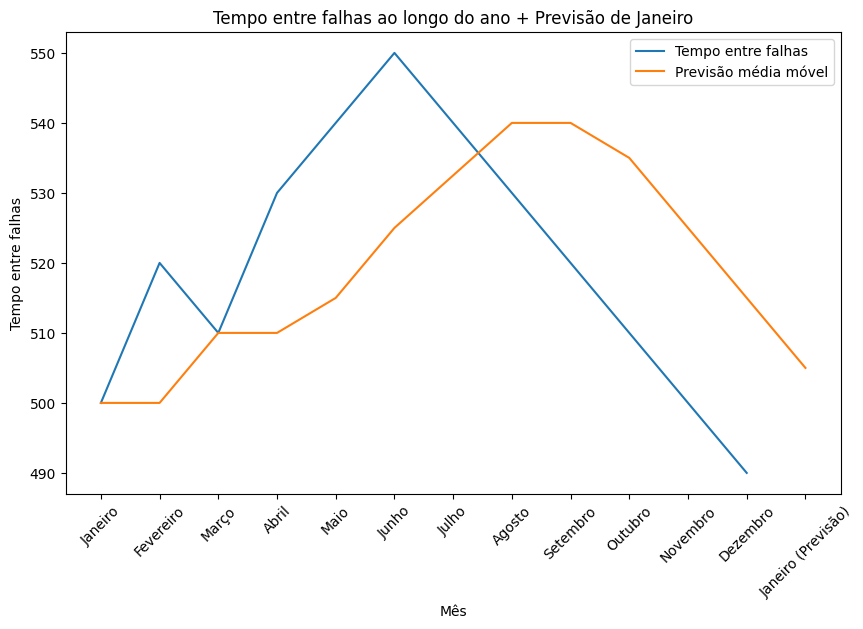

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data['month_name'], data['time_between_fails'], label="Tempo entre falhas")
plt.plot(data['month_name'], data['prevision'], label="Previsão média móvel")

plt.legend()

plt.title('Tempo entre falhas ao longo do ano + Previsão de Janeiro')
plt.xlabel('Mês')
plt.ylabel('Tempo entre falhas')
plt.xticks(rotation=45)

plt.show()

**c) Como você avaliaria a confiabilidade do servidor com base nesse indicador?**

Com base nesses indicadores, posso considerar o servidor como confiável, já que seu tempo entre falhas no mês varia entre próximo de 23 a 20 dias, dessa forma, ele tende a falhar apenas uma vez por mês. Contudo, analisando o gráfico, percebe-se uma tendência a diminuição do tempo entre falhas, o que pode ser um fator preocupante.